<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/%EC%8B%A4%EC%8A%B5/ADP%EC%8B%A4%EC%8A%B5_3%EC%A3%BC%EC%B0%A8_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 분석의 개념

Zt = {Z1, Z2, Z3 ... } #time log 

예측이 주 목적
 - 불규칙 성분
 - 추세성분
 - 계절 성분, 순환성분

예시: 연별 범죄 발생 건수, 일별 강우량, 주식데이터 등 시간을 기준으로 하는 데이터 

시간 t를 기준으로 측정하는 데이터를 말한다.
(관측 주기 time lag 가 동일해야 한다.)


(1) 불규칙 성분

 불규칙성분은 회귀모형에서의 오차항(Error term)과 같다.

즉 시간에 따라 규칙적인 움직임과 무관하게 랜덤한 원인에 의해 나타나는 변동성분을 의미.

그러므로 우리가 특정한 규칙이 없어 뭐랄까 특별히 설명할 수 없는 성분. 오차항이라고 간주하셔도 된다.

(2) 추세성분

추세성분은 불규칙성분과는 달리 시간이 경과함에 따라 관측값이 지속적으로 증가하거나 감소하는 추세를 갖는 경우의 변동을 의미

추세가 반드시 직선일 필요는 없고, 2차 곡선이나 3차 곡선의 형태로도 나타날 수 있다.

특히 거시경제의 여러 자료를 보면 시간이 흐름에 따라 상승하는 추세를 보인다.

예를 들어 소비지출과 같은 자료는 하방경직적이라고 함.

한번 상승하고 나면 잘 하락하지 않는 것을 의미

이러한 경우, 다음 시점의 값을 예측(Prediction)할 때, 이러한 추세(trend)를 고려해주는 것이 좋다.

(3) 계절성분

계절성분은 말 그대로 계절과 같은 일정한 주기에 따라 유사한 패턴이 반복되는 것을 말한다.

시간이 흐름에 따라 유사한 패턴이 계속 반복되는 거죠.

예를 들어 연말 크리스마스 시즌, 혹은 추석이나 설날 등 명절에 선물을 사려는 수요가 다른 시기에 비해 굉장히 많다.

그렇다면 월별 백화점 매출액 자료를 살펴보면, 추석 / 연말(크리스마스) / 연초(설날) 시즌엔 다른 시기와 달리 매출액 데이터가 클 것이며, 이는 매년 유사한 패턴을 보이며 반복할 것.

보통 두가지 이상 나타나기도 하는데, 추세 + 계절 성분이 같이 나타나기도 한다.


 즉, 시계열 데이터는 추세, 순환, 계절성, 불규칙요소로 이루어져 있으며 이를 식으로 나타내면 다음과 같다.

 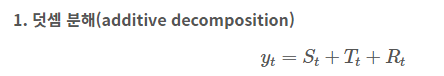

여기서 yt는 데이터이고, t는 시점, St는 계절 성분, Tt는 추세 및 순환성분, Rt는 불규칙 요소를 의미한다. 

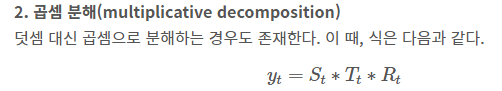

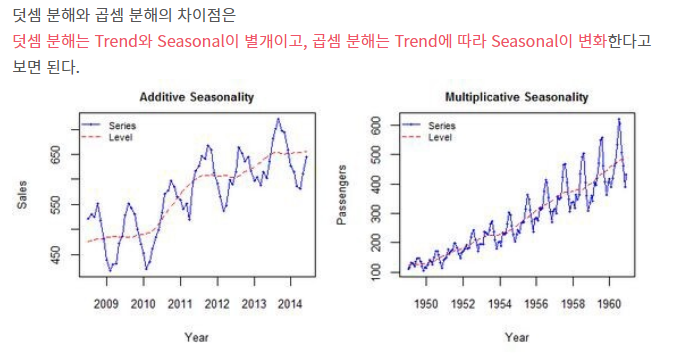

위 그림 첫 번째 예시는 시간이 지남에 따라 변동폭이 일정하지만, 두번째 그림은 Trend가 상승함에 따라 변동폭 역시 증가하고 있다. 

첫번째 예시는 덧셈, 두번째는 곱셈이 적절하다.

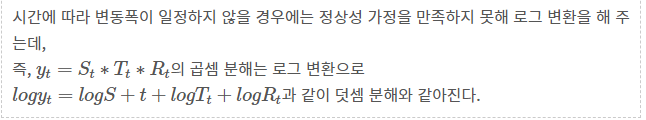

In [ ]:
#시계열은 시간에 따라 변하는 데이터를 분석하는 것이고, 분석 방법론에서는 정상성을 가정하기 때문에 정상성을 만족하는 데이터로 바꾸어주는것이 기본이다.

시계열 분석 중 ARIMA 모형에서는 정상성을 가정하고 있는데, 시간에 따라 변동폭이 일정하지 않을 경우에는 정상성 가정을 만족하지 못해 로그 변환을 해 주어야 한다.

Python에서는 statsmodel.tsa.seasonal 패키지의 seasonal_decompose() 함수를 이용하면 된다. 

typye에 "additive"나 "multiplicative"로 덧셈 분해와 곱셈 분해를 구분하여 넣어주면 된다.

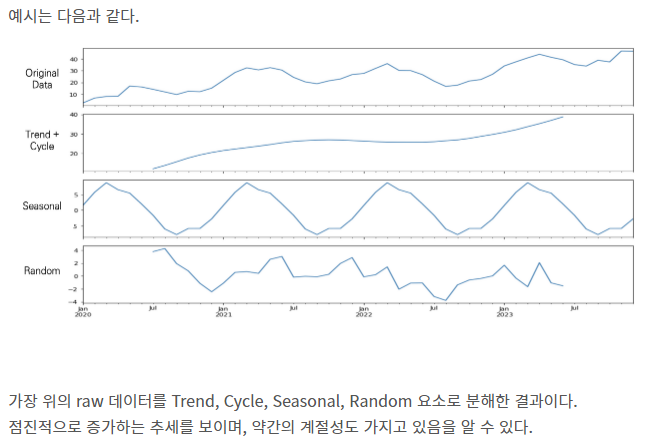

데이터를 각각의 패턴으로 해석하는 예시는 아래와 같다.

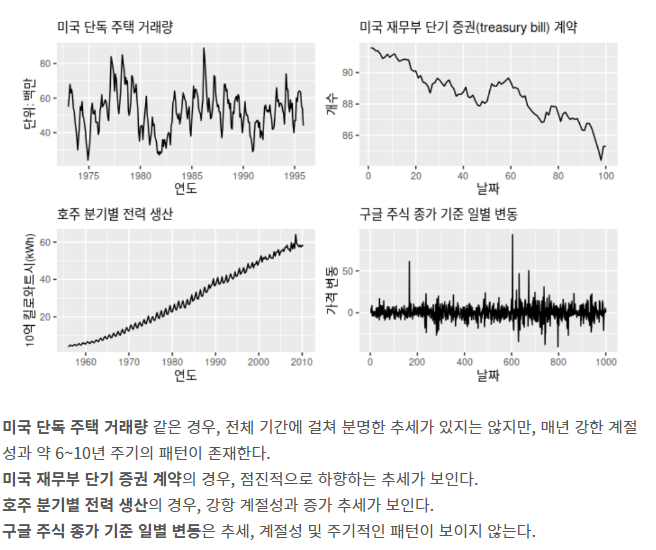

In [ ]:
#시계열 데이터 분석기법 중 가장 기본이 되는 ARIMA 모형 설명

#ARIMA란?

Autoregressive Integrated Moving Average 라는 뜻으로, AR(Autoregression) 모형과 MA(Moving Average) 모형을 합친 모형이다.

AR과 MA 모형에 대해 설명하기 전에, ARIMA 모형은 시계열 데이터의 정상성(Stationary)를 가정하고 있는데,

정상성이란?

평균, 분산이 시간에 따라 일정한 성질이다. 즉, 시계열 데이터의 특성이 시간의 흐름에 따라 변하지 않음을 의미한다.

예로, 추세나 계절성이 있는 시계열은 정상 시계열이 아니다.

이렇듯 정상성을 나타내지 않는 데이터는 복잡한 패턴을 모델링하여 분석하기 어렵기 때문에, 정상성을 갖도록 로그 변환, 차분 등 전처리 후 분석을 시행한다.

정상 시계열 변환
정상성을 나타내지 않는 데이터를 정상 시계열로 변환하는 방법은 다음과 같다.

1. 변동폭이 일정하지 않은 경우 -> 로그 변환

2. 추세, 계절성이 존재하는 경우 -> 차분
단, 1차 차분으로 정상성을 띄지 않으면, 차분을 반복한다.

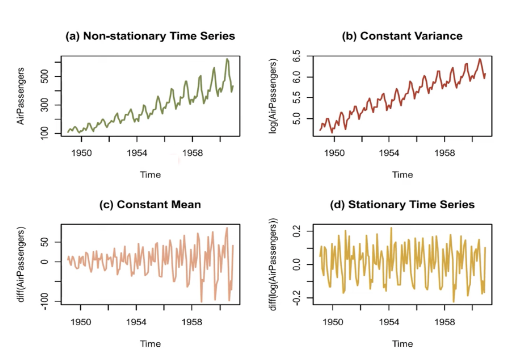

예로 위 (a)와 같이 시간에 따라 변동폭이 일정하지 않고, 추세와 계절적 영향이 존재하는 비정상 시계열이 존재한다.

로그 변환을 하면 (b)와 같이 변동폭이 일정해지고, 차분을 하면 (c)와 같이 평균이 일정한 시계열로 변환된다.

즉, 로그 변환과 차분을 함께하여 (d)와 같이 평균과 분산이 일정한 정상 시계열로 변환할 수 있다.

 

AR 모형이란?
자귀 회귀 모형으로, Auto Correlation의 약자이다.

자기상관성을 시계열 모형으로 구성하였으며, 예측하고자 하는 특정 변수의 과거 관측값의 선형결합으로 해당 변수의 미래값을 예측하는 모형이다.

이전 자신의 관측값이 이후 자신의 관측값에 영향을 준다는 아이디어에 기반하였다.

AR(p) 모형의 식은 다음과 같다.

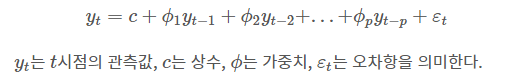

MA 모형이란?
Moving Average 모형으로, 예측 오차를 이용하여 미래를 예측하는 모형이다.

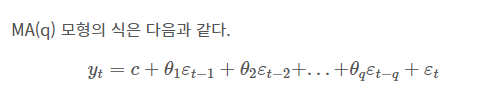

ARIMA 모형이란?
ARIMA(p,d,q) 모형은 d차 차분한 데이터에 위 AR(p) 모형과 MA(q) 모형을 합친 모형으로, 식은 다음과 같다.

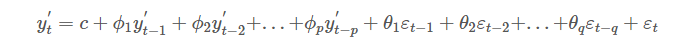

AR(p)모형과 ARIMA(p,0,0)모형은 같은 모형이며, MA(q)모형과 ARIMA(0,0,q) 모형은 같은 모형이다.

p와 q는 ACF 그래프와 PACF 그래프를 그려서 확인한다.

ACF(자기상관함수, AutoCorrelation Function)란?
시차에 따른 일련의 자기상관을 의미하며, 시차가 커질수록 ACF는 0에 가까워진다.

정상 시계열은 상대적으로 빠르게 0에 수렴하며, 비정상 시계열은 천천히 감소하고, 종종 큰 양의 값을 가진다.

 
ACF는 정상성을 판단하는데 유용하다.

예로 다음은 200일 동안의 구글 주식 가격에 대한 그래프이다.

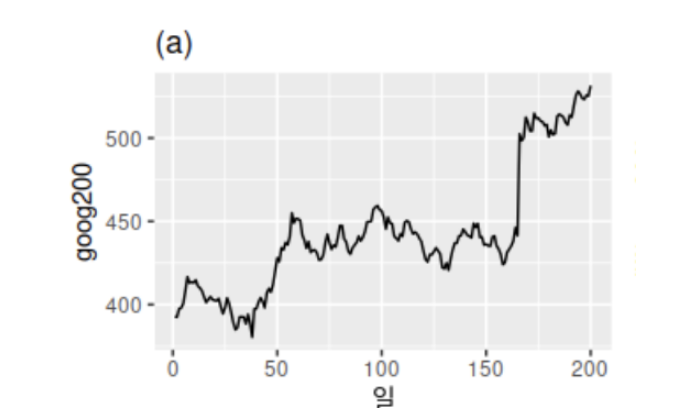

점진적으로 증가하는 분명한 추세가 있기 때문에 정상성을 띄지 않는다.

이를 ACF 그래프로 그려보면 다음과 같다.

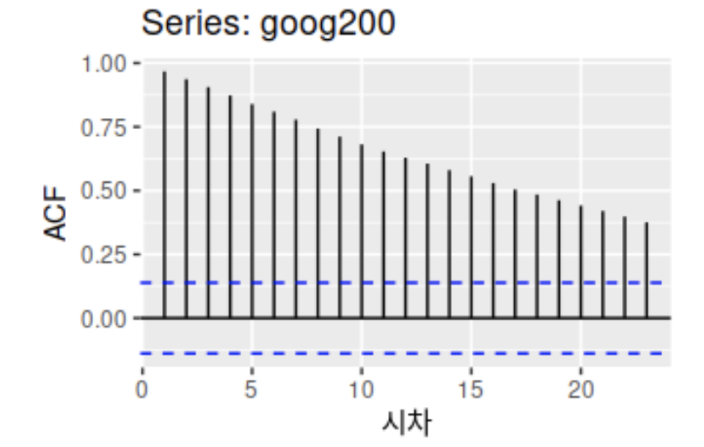

ACF가 아주 느리게 감소하는 것을 볼 수 있다.


차분을 하여 정상 시계열로 변환한 뒤 ACF를 그려보면 다음과 같다.

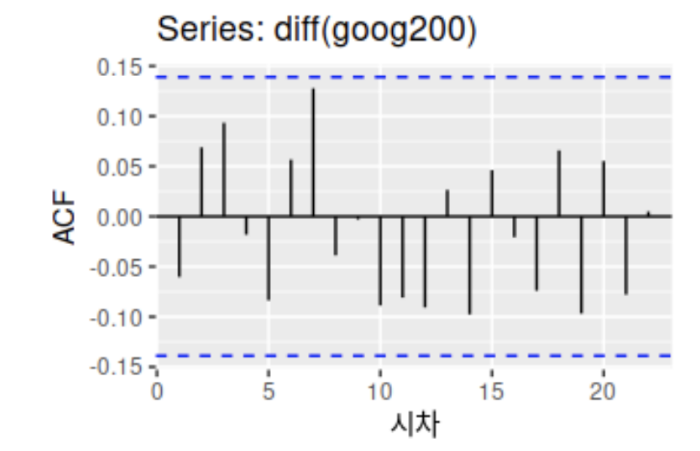

그래프의 y축을 보면 차분 전 ACF 그래프에 비해 값 자체가 훨씬 0에 가까우며, 비교적 빠르게 0에 수렴하는 것을 볼 수 있다.

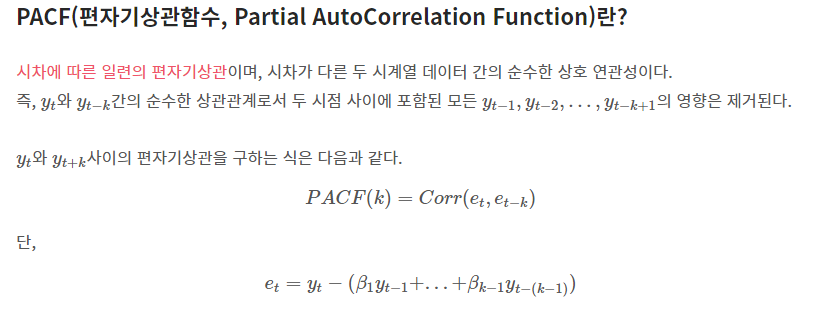

즉, ACF와 PACF를 동시에 고려하여 ARIMA 모델의 p와 q를 결정하는데 그 방법은 다음과 같다.

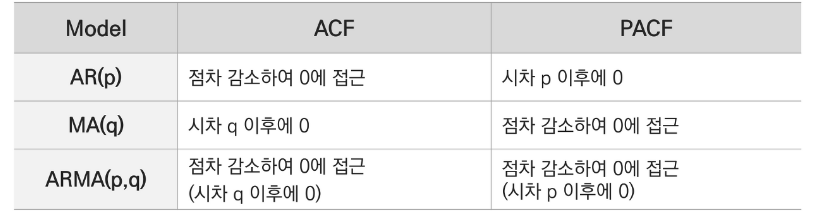

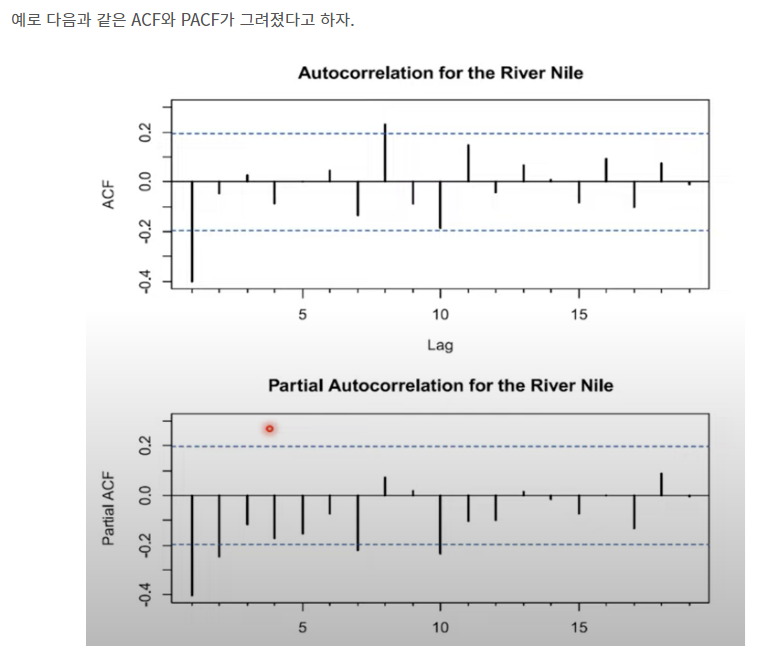


ACF는 시차1 이후에 0에 가까워지고, PACF는 시차2 이후에 0에 수렴했다.

ACF와 PACF 모두 점진적으로 0에 이르고 있다.

따라서 AR(2), MA(1), ARIMA(2,1) 등의 모델을 활용할 수 있다.

모델링을 마친 후 잔차의 ACF 그래프를 그려, 정상성을 따르는지 확인해야 한다. 만약, 정상성을 따르지 않는다면, p,d,q의 파라미터를 재조정하여 다시 모델링하는 작업을 진행해야 한다.

In [1]:
#kaggle 데이터로 ARIMA 실습해보기
#총 2가지 날씨 데이터이며, 하나는 station별 위도, 경도 등 위치가 표시되어있는 위치데이터, 
#하나는 station 별 실제 온도 데이터이다.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
# import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

import os
import warnings        
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.

weather_station_location = pd.read_csv("https://raw.githubusercontent.com/GUNWOOOH/ADP_Practice/main/%EC%8B%A4%EC%8A%B5/Weather%20Station%20Locations.csv")
weather = pd.read_csv("https://raw.githubusercontent.com/GUNWOOOH/ADP_Practice/main/%EC%8B%A4%EC%8A%B5/Summary%20of%20Weather.csv")

weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather = weather.loc[:,["STA","Date","MeanTemp"] ]

Weather station location:
 - WBAN: Weather station number
 - NAME: weather station name
 - STATE/COUNTRY ID: acronym of countries
 - Latitude: Latitude of weather station
 - Longitude: Longitude of weather station

 
Weather:
 - STA: eather station number (WBAN)
 - Date: Date of temperature measurement
 - MeanTemp: Mean temperature

In [2]:
#상위 5개 확인해보기

weather_station_location.head(5)

,WBAN,NAME,STATE/COUNTRY ID,Latitude,Longitude
0,33013,AIN EL,AL,36.383333,6.650000
1,33031,LA SENIA,AL,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,36.716667,3.216667
3,33044,TELERGMA,AL,36.116667,6.416667
4,12001,TINDOUF,AL,27.683333,-8.083333


여러 지역 중 BINDUKURI 지역에 대한 일 평균 온도 대상으로 분석 진행

In [3]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == int(weather_station_id)]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])

In [4]:
weather_bin

,STA,Date,MeanTemp
78252,32907,1943-05-11,28.888889
78253,32907,1943-05-12,25.555556
78254,32907,1943-05-13,24.444444
78255,32907,1943-05-14,23.888889
78256,32907,1943-05-15,27.777778
...,...,...,...
78998,32907,1945-05-27,23.333333
78999,32907,1945-05-28,25.555556
79000,32907,1945-05-29,24.444444
79001,32907,1945-05-30,25.555556


1943년 5월 11일부터 1945년 5월 31일까지 일단위 평균 온도이다.

이를 시계열 그래프로 그려보면 다음과 같다.

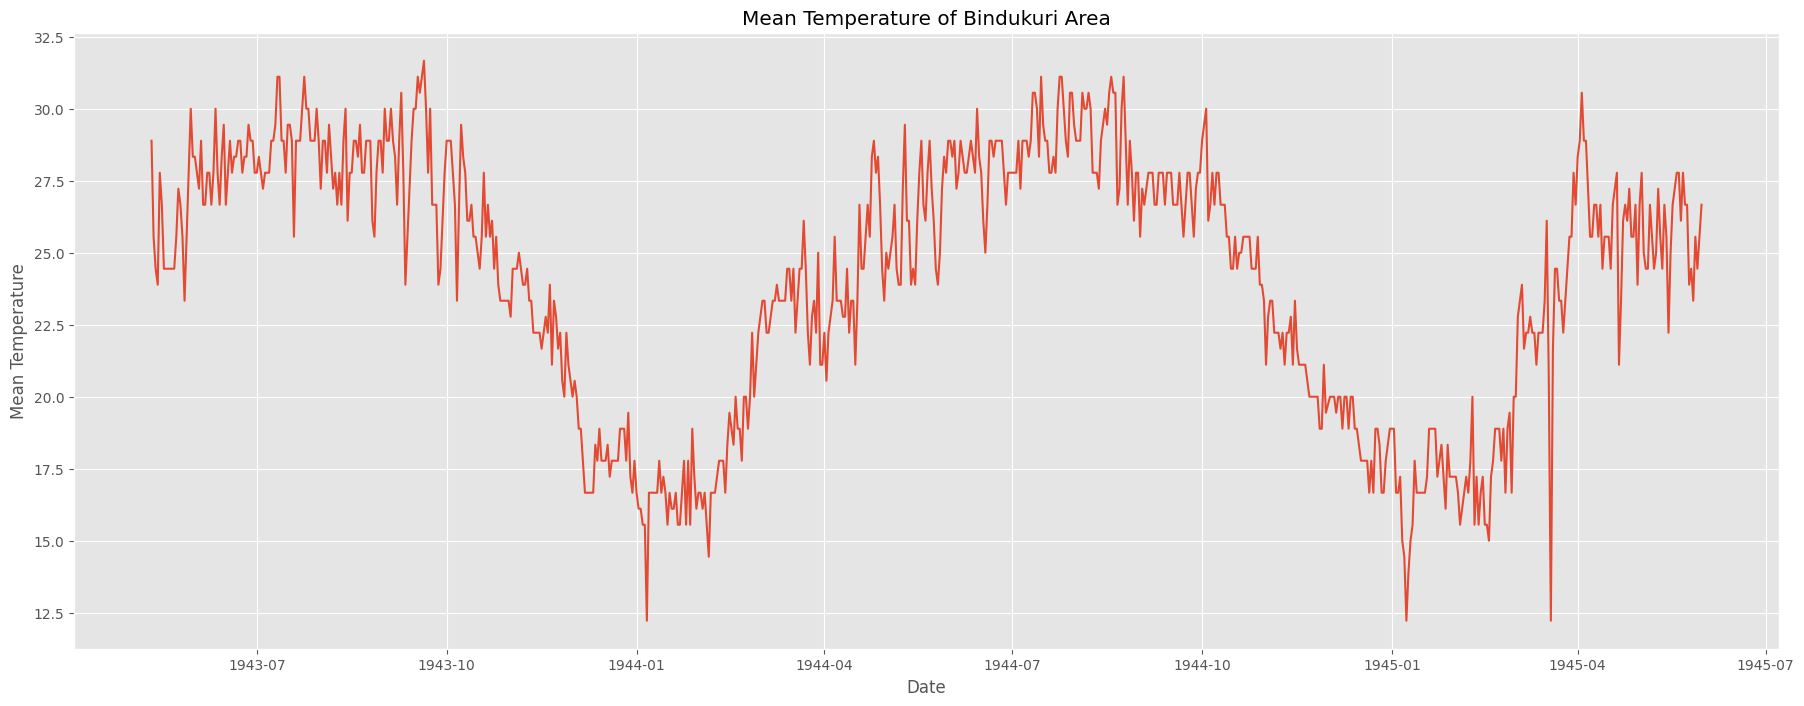

In [5]:
plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

ts 형태의 데이터 만들어주기

In [15]:
# lets create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

data = weather_bin.loc[:, ["Date","MeanTemp"]]
data = data.dropna(axis=0)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date').asfreq('D')
ts = data.fillna(data.mean())
data.head(3)

,MeanTemp
Date,
1943-05-11,28.888889
1943-05-12,25.555556
1943-05-13,24.444444


In [16]:
ts

,MeanTemp
Date,
1943-05-11,28.888889
1943-05-12,25.555556
1943-05-13,24.444444
1943-05-14,23.888889
1943-05-15,27.777778
...,...
1945-05-27,23.333333
1945-05-28,25.555556
1945-05-29,24.444444


위에서 언급한 seasonal_decompose()를 활용하여 분해한다.

<Figure size 640x480 with 0 Axes>

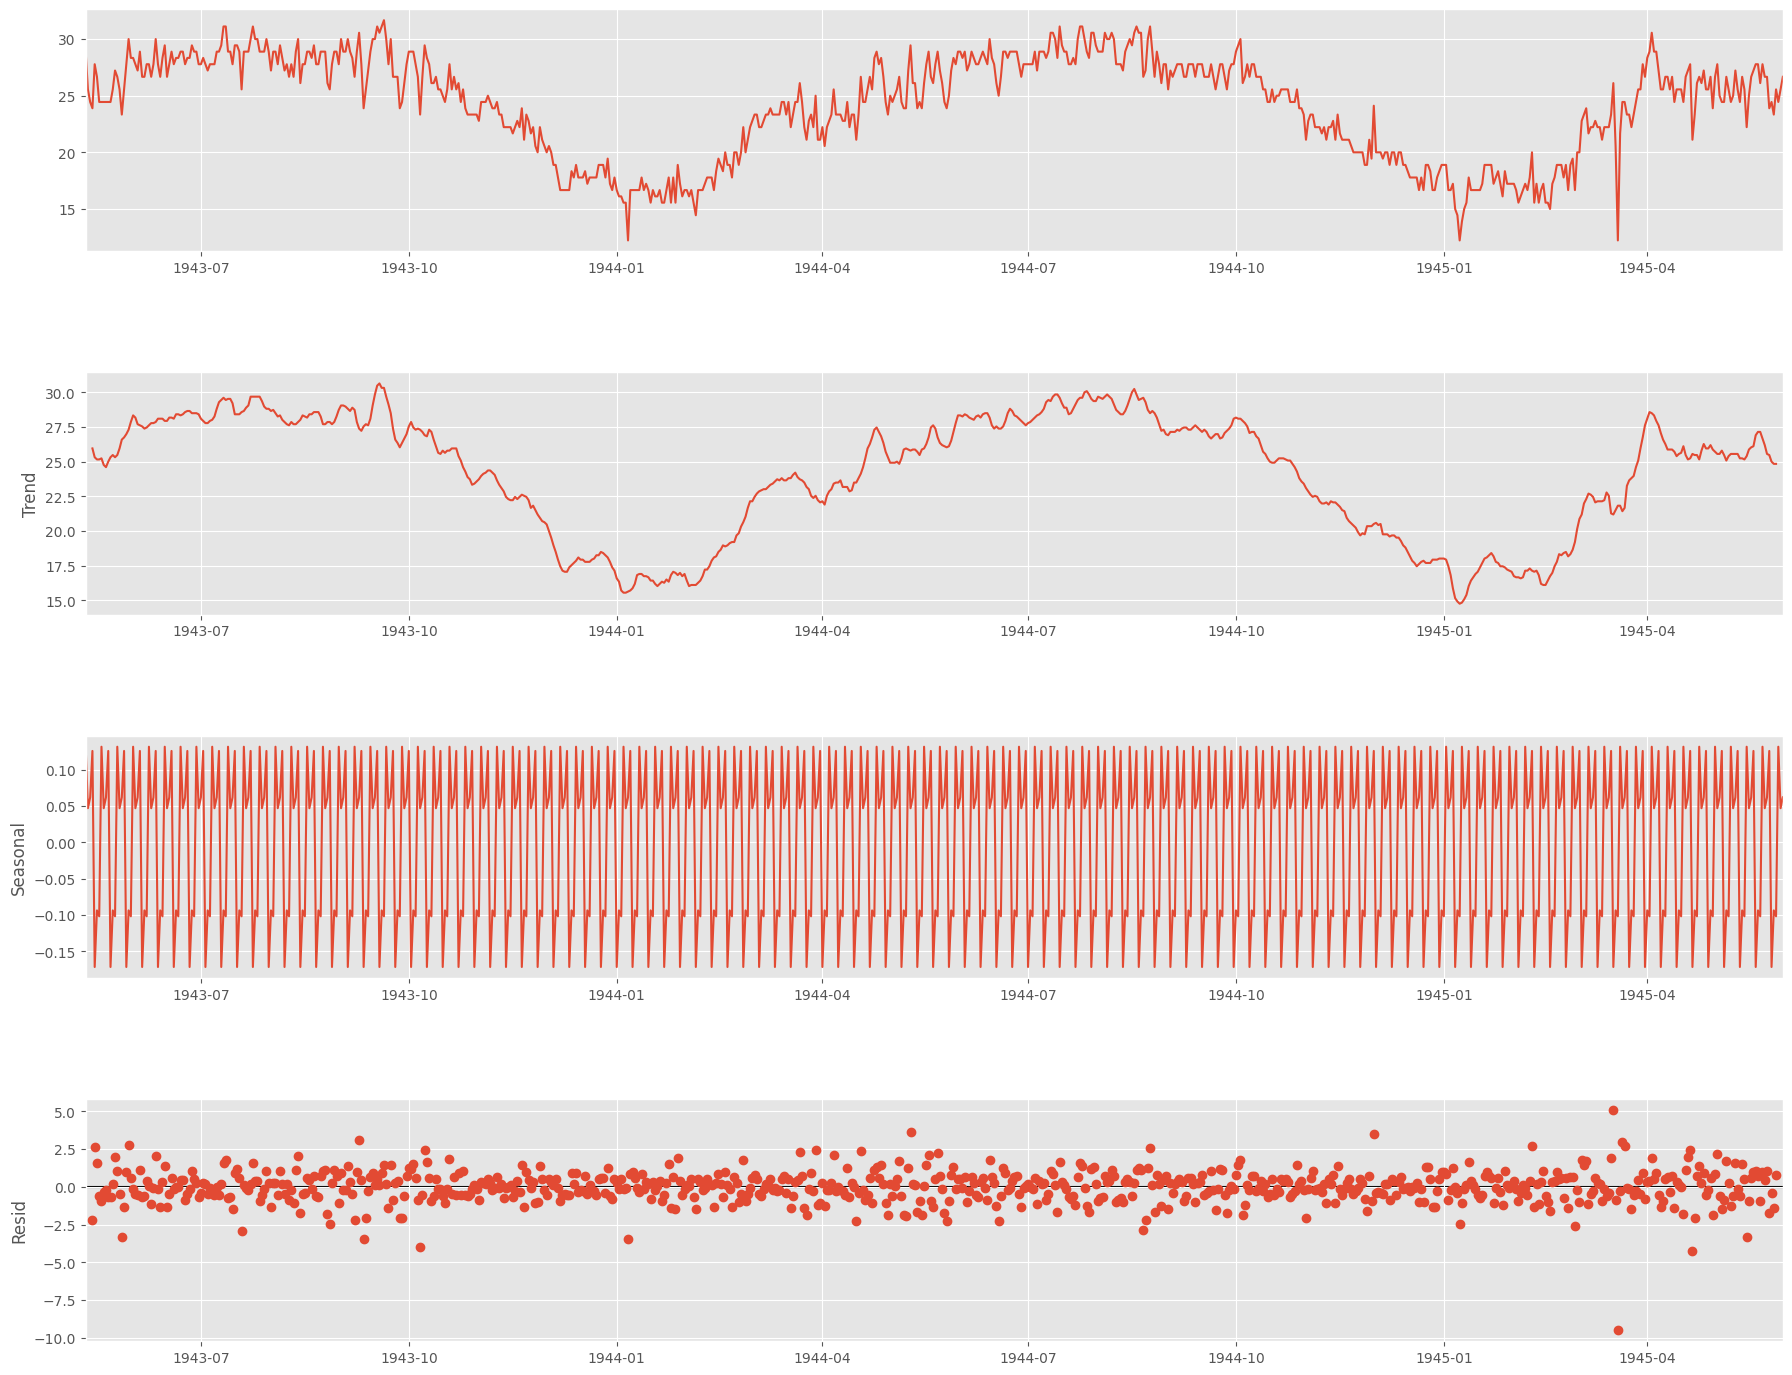

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(ts, model='additive')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(20, 15)



데이터가 패턴이 보이기 때문에 정상성이 의심된다. 이를 판단하기 위해 ACF 그래프를 그려보았다.

 

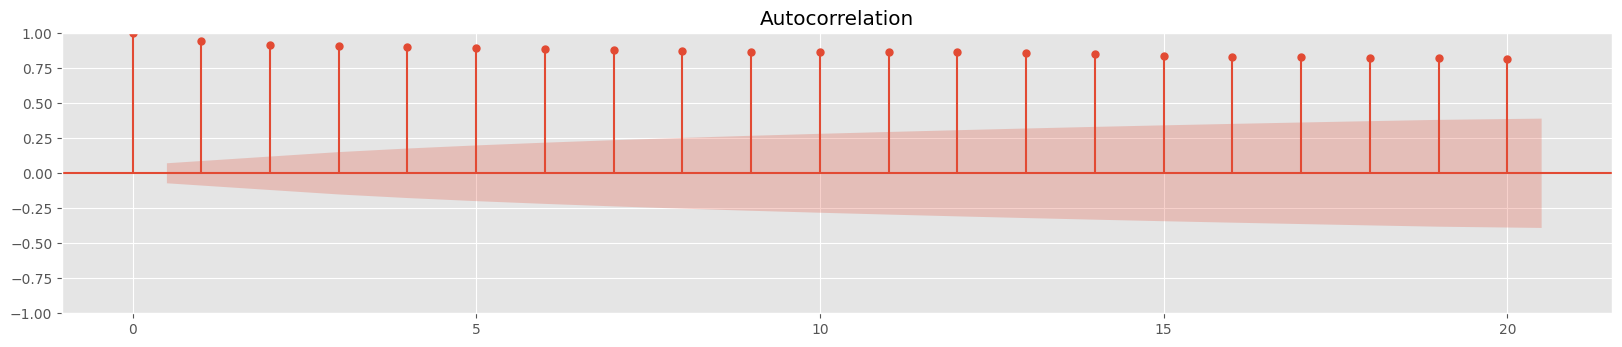

In [20]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

아주아주 천천히 값이 작아지는 것을 볼 수 있다. 이전 포스팅에서 언급했듯이, ACF 값이 아주아주 천천히 감소하는 것은 정상성을 만족하지 않는다는 것을 의미한다. 

 

이번에는 단위근 검정인 ADF 검정(Augmented Dickey-Fuller test)으로 정상성을 확인해보겠다. 

이 검정의 가설은 다음과 같다.

 

H0(귀무가설) : 자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다. 

H1(대립가설) : 자료가 정상성을 만족한다.

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.414531
p-value: 0.575290
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


p-value가 0.05를 넘으므로, 귀무가설을 기각하지 못한다. 즉, 해당 데이터는 정상성을 만족하지 못한다.

이를 해결하기 위해 1차 차분을 해주었다.

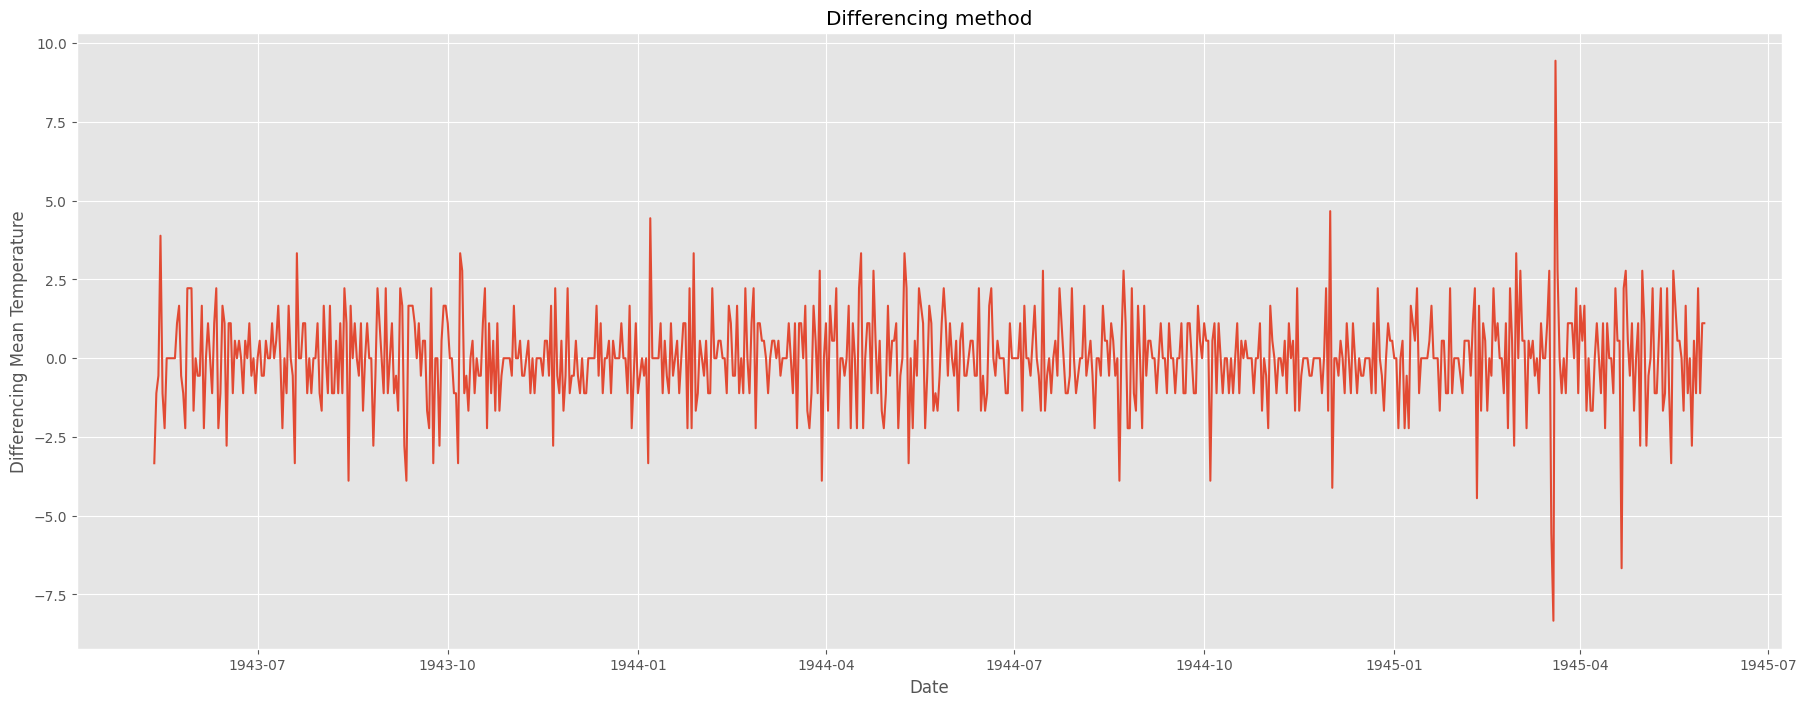

In [22]:
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

일정한 패턴이 확인되지 않고, 정상성을 만족하는 듯 보인다.

ADF 검정 결과는 다음과 같다.

In [23]:
result = adfuller(ts_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.686175
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉, 1차 차분한 데이터는 정상성을 만족한다.

정상성을 만족하는 차분된 데이터로 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정한다.

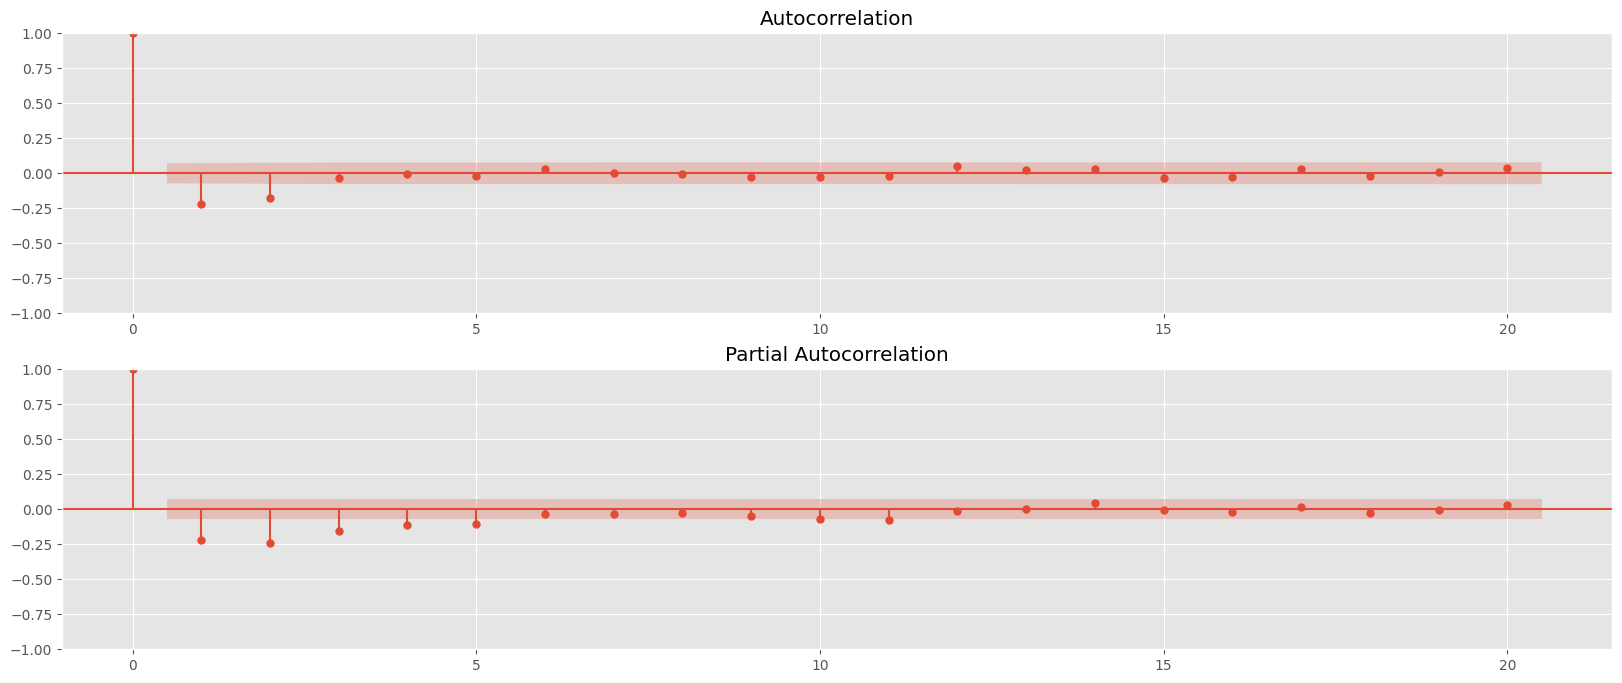

In [24]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)# , lags=40

ACF와 PACF 모두 금방 0에 수렴하고, 2번째 lag 이후 0에 수렴한다. 

즉, ARIMA(2,1,2) 모형을 base model로, ARIMA(2,1,1), ARIMA(1,1,2), ARIMA(1,1,1) 등의 모델을 시도해 볼 수 있다.

ARIMA(2,1,2) 모델의 결과이다.

책에서 처럼 training과 test 데이터로 나누어서 학습과 예측을 진행한다.

In [39]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

training = data[:"1945-04-01"]
test = data.drop(training.index)
# fit model
model = ARIMA(training, order=(2,1,2))
model_fit = model.fit()

res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               MeanTemp   No. Observations:                  692
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1155.273
Date:                Mon, 24 Apr 2023   AIC                           2320.545
Time:                        13:17:49   BIC                           2343.236
Sample:                    05-11-1943   HQIC                          2329.322
                         - 04-01-1945                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0761      0.373      0.204      0.838      -0.654       0.806
ar.L2          0.0486      0.198      0.246      0.806      -0.339       0.436
ma.L1         -0.4095      0.377     -1.087      0.277      -1.148       0.329
ma.L2         -0.2681      0.320     -0.839      0.402      -0.895       0.359
sigma2         1.6646      0.061     27.392      0.000       1.546       1.784
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               416.71
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.48
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

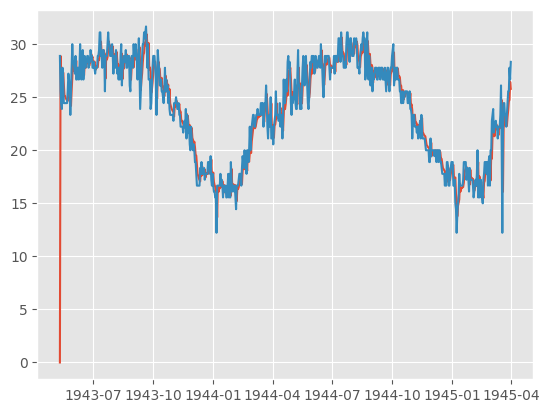

In [41]:
plt.plot(res.predict())
plt.plot(training)

위 코드에서 중의할 점은 model fitting 시 typ = 'levels'로 해 주어야 한다. 

차분이 들어간 모델의 경우 typ을 default 파라미터인 'linear'로 설정해 줄 경우 차분한 값에 대한 결과가 나오기 때문이다.

눈으로 볼 때 결과가 아주 좋아보인다. 마지막으로 잔차 분석을 통해 모델에 빠진 것이 없는지, 문제가 없는지 확인한다.

잔차는 어떠한 패턴이나 특성이 나타나서는 안된다.

어떤 패턴이 있다는 것은 모델에 그만큼 덜 적용이 되었다는 것을 의미하기 때문이다.

In [46]:
forecast_data = res.forecast(steps=len(test), alpha=0.05)
pred_y = forecast_data
test_y = test
pred_y.head(5) #예측 데이터


1945-04-02    27.306994
1945-04-03    26.628019
1945-04-04    26.526413
1945-04-05    26.485653
1945-04-06    26.477609
Freq: D, Name: predicted_mean, dtype: float64

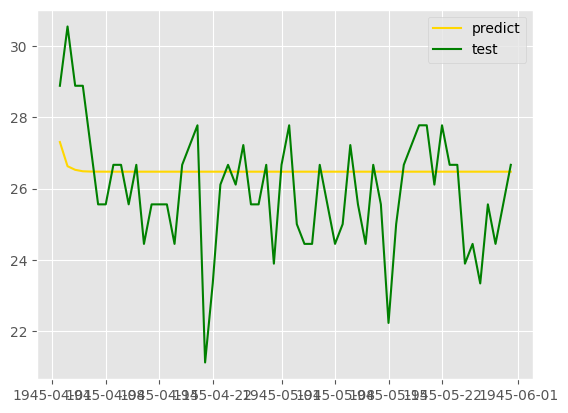

In [49]:
plt.plot(pred_y, color="gold", label='predict')
plt.plot(test_y,color="green", label='test')
plt.legend()
plt.show()

예측을 별로 못했음을 볼 수 있다. R^2을 확인해봦

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("r2_score : ", r2_score(test_y, pred_y))
RMSE = mean_squared_error(test_y, pred_y)**0.5
print("RMSE : ", RMSE)

r2_score :  -0.06715243880990185
RMSE :  1.6923469104991284


R2값이 음수가 나온다는 것은 정확도가 매우 낮다는 것. 

이는 ARIMA의 경우 긴 값을 예측할 때 표본평균으로 회귀하는 경향 때문이다.

계절성지수가 추가된 SARIMA 모델을 사용하는 것이 좋겠다.

#과제

파이썬 한권으로 끝내기를 보고, 위 데이터에 SARIMA 모형을 대입하고 결과를 도출하시오

HINT: AUTO_ARIMA